In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.callbacks import TensorBoard
from keras.datasets import cifar10

2022-11-15 02:54:02.571769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 02:54:02.717654: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 02:54:03.224701: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.8/lib64:
2022-11-15 02:54:03.224758: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libn

# Image Reconstruction

In [51]:
# Initial Autoencoder architecture by the assignment instructions

input_img = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='valid')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='valid')(x)
encoded = layers.Conv2D(32, (5, 5), activation='relu', padding='same')(x)


x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(encoded)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

In [52]:
# Best Autoencoder architecture by the result of trial and error of different experiments

input_img = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(6, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='valid')(x)
x = layers.Conv2D(12, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='valid')(x)
x = layers.Conv2D(24, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='valid')(x)
encoded = layers.Conv2D(48, (3, 3), activation='relu', padding='same')(x)


x = layers.Conv2D(24, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(encoded)
x = layers.Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(6, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

In [53]:
(x_train, _), (x_test, _) = cifar10.load_data()

# normalization
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

# split validation and test
x_val, x_test = x_test[0:5000], x_test[5000:]

In [54]:
# prepare for training

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
autoencoder.summary()

history = autoencoder.fit(x_train, x_train,
                epochs=50,
                shuffle=True,
                validation_data=(x_val, x_val),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 12)        336       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 12)       0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 24)        2616      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 24)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 48)          1041

1563/1563 [==============================] - 12s 8ms/step - loss: 0.0021 - accuracy: 0.8293 - val_loss: 0.0020 - val_accuracy: 0.8300
Epoch 43/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0021 - accuracy: 0.8301 - val_loss: 0.0021 - val_accuracy: 0.8312
Epoch 44/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0021 - accuracy: 0.8302 - val_loss: 0.0021 - val_accuracy: 0.8443
Epoch 45/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0020 - accuracy: 0.8311 - val_loss: 0.0020 - val_accuracy: 0.8423
Epoch 46/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0020 - accuracy: 0.8302 - val_loss: 0.0020 - val_accuracy: 0.8272
Epoch 47/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0020 - accuracy: 0.8315 - val_loss: 0.0020 - val_accuracy: 0.8373
Epoch 48/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0020 - accuracy: 0.8314 - val_loss: 0.0020 - val_accurac

In [55]:
# Evaluate the model on the test data
print("Evaluate on test data")
results = autoencoder.evaluate(x_test, x_test)
print("test loss, test acc:", results)

Evaluate on test data
157/157 [==============================] - 1s 5ms/step - loss: 0.0020 - accuracy: 0.8439
test loss, test acc: [0.001966372597962618, 0.8438800573348999]


In [56]:
# load model parameters (use h5 alternatively)
# autoencoder = keras.models.load_model('model/saved_model.pb')

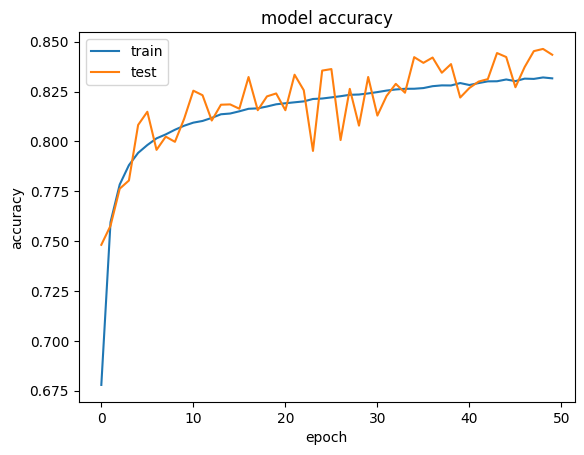

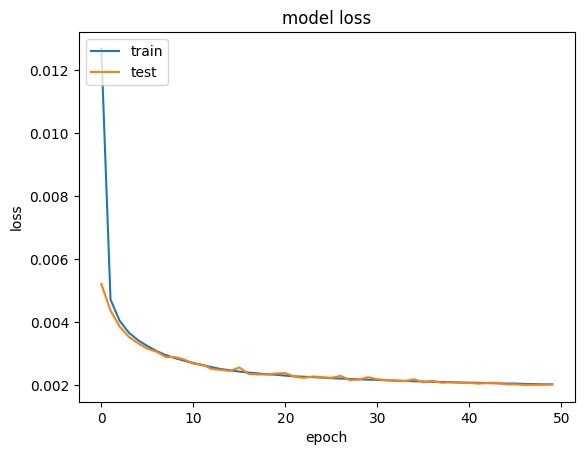

In [57]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
print("Generate predictions for 3 samples")
predictions = autoencoder.predict(x_test[10:13])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 [==============================] - 0s 115ms/step
predictions shape: (3, 32, 32, 3)


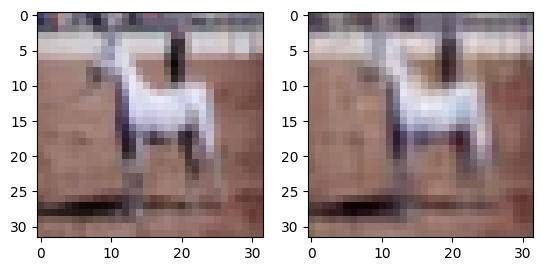

In [59]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(x_test[10])
axs[1].imshow(predictions[0]);

# Colorization

In [9]:
# Autoencoder architecture

input_img = keras.Input(shape=(32, 32, 1))

x = layers.Conv2D(6, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='valid')(x)
x = layers.Conv2D(12, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='valid')(x)
x = layers.Conv2D(24, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='valid')(x)
encoded = layers.Conv2D(48, (3, 3), activation='relu', padding='same')(x)


x = layers.Conv2D(24, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(encoded)
x = layers.Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(6, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

In [10]:
(y_train, _), (y_test, _) = cifar10.load_data()

y_train = y_train.astype('float32') / 255.
y_test = y_test.astype('float32') / 255.
y_train = np.reshape(y_train, (len(y_train), 32, 32, 3))
y_test = np.reshape(y_test, (len(y_test), 32, 32, 3))

y_val, y_test = y_test[0:5000], y_test[5000:]

In [11]:
# grayscale all input samples

def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

x_train = rgb2gray(y_train)
x_test = rgb2gray(y_test)
x_val = rgb2gray(y_val)

In [12]:
colorizer_model = keras.Model(input_img, decoded)
colorizer_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
colorizer_model.summary()

history = colorizer_model.fit(x_train, y_train,
                epochs=50,
                shuffle=True,
                validation_data=(x_val, y_val),
                callbacks=[TensorBoard(log_dir='/tmp/colorizer_model')])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 12)        120       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 12)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 24)        2616      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 24)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 48)          1041

1563/1563 [==============================] - 12s 8ms/step - loss: 0.0070 - accuracy: 0.5001 - val_loss: 0.0072 - val_accuracy: 0.5029
Epoch 43/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0070 - accuracy: 0.5019 - val_loss: 0.0071 - val_accuracy: 0.4977
Epoch 44/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0070 - accuracy: 0.5015 - val_loss: 0.0076 - val_accuracy: 0.5273
Epoch 45/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0070 - accuracy: 0.5017 - val_loss: 0.0070 - val_accuracy: 0.4865
Epoch 46/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0070 - accuracy: 0.5024 - val_loss: 0.0070 - val_accuracy: 0.4942
Epoch 47/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0070 - accuracy: 0.5025 - val_loss: 0.0071 - val_accuracy: 0.4711
Epoch 48/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0070 - accuracy: 0.5023 - val_loss: 0.0070 - val_accurac

In [16]:
colorizer_model.save('colorizer_model')
# colorizer_model.load_model()

INFO:tensorflow:Assets written to: colorizer_model/assets


INFO:tensorflow:Assets written to: colorizer_model/assets


In [17]:
# Evaluate the model on the test data
print("Evaluate on test data")
results = colorizer_model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
157/157 [==============================] - 1s 5ms/step - loss: 0.0068 - accuracy: 0.4853
test loss, test acc: [0.006790702696889639, 0.48527538776397705]


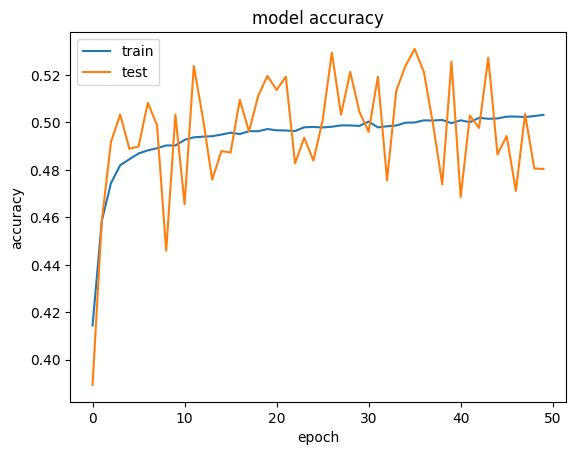

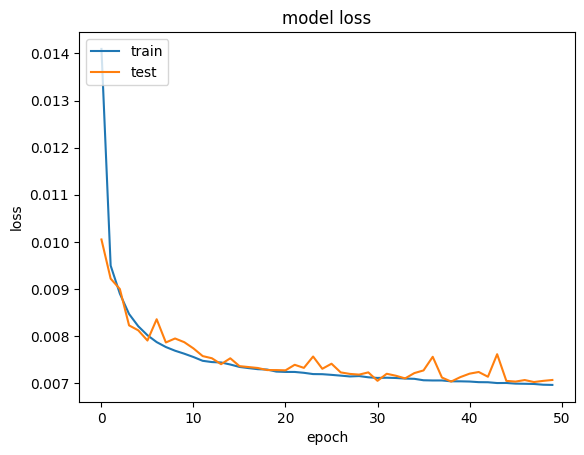

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
# testing out

N = 31

print("Generate predictions for 3 samples")
predictions = colorizer_model.predict(x_test[N:N+1])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 [==============================] - 0s 22ms/step
predictions shape: (1, 32, 32, 3)


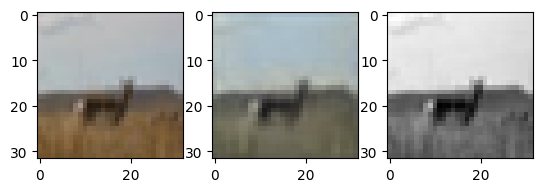

In [45]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(y_test[N])
axs[1].imshow(predictions[0])
axs[2].imshow(x_test[N], cmap='gray');

## Testing my picture

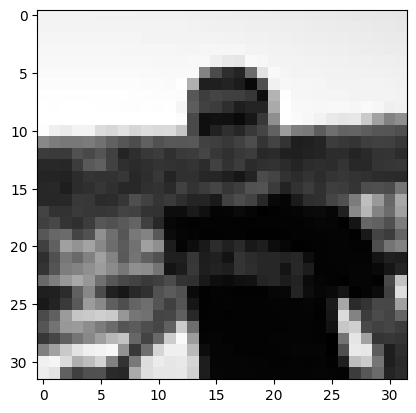

In [97]:
from PIL import Image

foti = Image.open("foti.png")
foti = foti.resize((32, 32))
foti = np.array(foti)
foti = foti.astype('float32') / 255.
foti_gray = rgb2gray(foti)
plt.imshow(foti_gray, cmap='gray');

In [98]:
# testing out

N = 31

print("Generate predictions for 3 samples")
predictions = colorizer_model.predict(np.array([foti_gray]))
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 [==============================] - 0s 21ms/step
predictions shape: (1, 32, 32, 3)


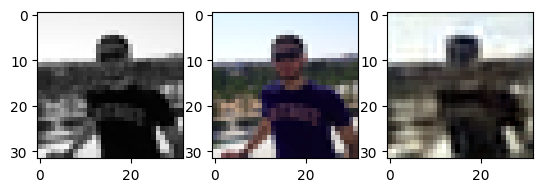

In [99]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(foti_gray, cmap='gray')
axs[1].imshow(foti)
axs[2].imshow(predictions[0]);